In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
merged_df = city_data.merge(ride_data, on = 'city')
# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

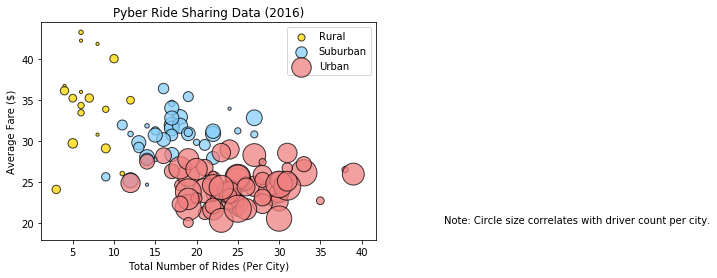

In [3]:
# Obtain the x and y coordinates for each of the three city types
by_city = merged_df.groupby('city')

avg_fare = by_city.mean()['fare']

ride_count = by_city['ride_id'].count()

driver_count = by_city.mean()['driver_count']

city_type = city_data.set_index('city')['type']

#city_type = city_data.set_index('city')['type']

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

# Build the scatter plots for each city types

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = 'gold', 
            edgecolor = 'black', label = 'Rural', alpha = .75)

plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = 'lightskyblue', 
            edgecolor = 'black', label = 'Suburban', alpha = .75)

plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = 'lightcoral', 
            edgecolor = 'black', label = 'Urban', alpha = .75)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
plt.legend(loc= "upper right")


# Incorporate a text label regarding circle size
plt.text(50, 20,"Note: Circle size correlates with driver count per city.")


# Save Figure
plt.savefig("data/pyber_bubbleplot.png")

In [58]:
# Show plot
plt.show()

## Total Fares by City Type

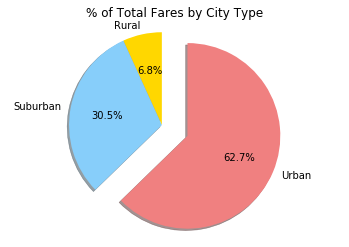

<Figure size 432x288 with 0 Axes>

In [19]:
# Calculate Type Percents
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare_sum = by_type.sum()['fare']
# Build Pie Chart
labels = fare_sum.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, 
        labels = labels, autopct = "%1.1f%%", shadow = True, 
        wedgeprops = {'linewidth': .5})
#plt.legend(labels, loc="best") #legend
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig("data/pyber_totalfares_pie.png")

## Total Rides by City Type

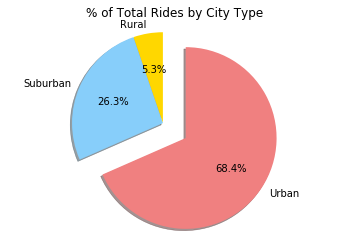

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate Ride Percents
ride_sum = by_type.count()['ride_id']
# Build Pie Chart
labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, 
        labels = labels, autopct = "%1.1f%%", shadow = True, 
        wedgeprops = {'linewidth': .5})

plt.title('% of Total Rides by City Type')
plt.axis('equal')

plt.show()
# Save Figure
plt.savefig("data/pyber_totalrides_pie.png")

## Total Drivers by City Type

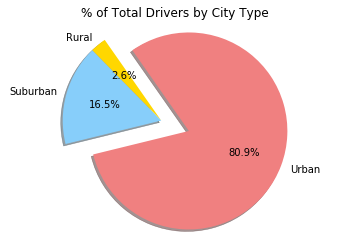

In [16]:
# Calculate Driver Percents
driver_sum = city_data.groupby('type').sum()['driver_count']
# Build Pie Charts
labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, 
        labels = labels, autopct = "%1.1f%%", shadow = True, 
        wedgeprops = {'linewidth': .5})

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
# Save Figure
plt.savefig("data/pyber_totaldrivers_pie.png")

plt.show()